# 艺术家指南

艺术家是Artist对象的昵称，用于在画布上渲染。

matplotlib API 分三层：
- matplotlib.backend_bases.FigureCanvas 是绘制图形的区域
- matplotlib.backend_bases.Renderer 是知晓如何在 FigureCanvas 上绘制的对象
- matplotlib.artist.Artist 是知晓如何使用渲染器在画布上绘制的对象

FigureCanvas和Renderer处理与诸如wxPython之类的用户界面工具包，或PostScript®之类的绘图语言会话的所有细节，而Artist处理所有高级结构，如表示和布置图形，文本和线条。 典型用户95％的时间与艺术家合作。

艺术家有两种类型：图元与容器。图元表示绘制在画布上的标准图形对象，如：Line2D，Rectangle，Text，AxesImage等，容器是放置图元的位置如：Axis，Axes和Figure。标准用法是创建一个Figure实例，使用Figure来创建一个或多个Axes或Subplot实例，并使用Axes实例的辅助方法创建图元。

在下面的示例中，使用matplotlib.pyplot.figure()创建一个Figure实例，这是实例化Figure并将其与用户界面或图形工具箱FigureCanvas连接的一种便捷方法。正如我们将在下面讨论的那样，这不是必须的（可以直接使用PostScript，PDF Gtk +或wxPython FigureCanvas实例，直接实例化Figures并将它们自己连接起来）但是由于我们将重点放在Artist API上，因此我们将让pyplot为我们处理其中一些细节：

In [1]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2, 1, 1) # two rows, one column, first plot

> The Axes is probably the most important class in the matplotlib API, and the one you will be working with most of the time. This is because the Axes is the plotting area into which most of the objects go, and the Axes has many special helper methods (plot(), text(), hist(), imshow()) to create the most common graphics primitives (Line2D, Text, Rectangle, AxesImage, respectively). These helper methods will take your data (e.g., numpy arrays and strings) and create primitive Artist instances as needed (e.g., Line2D), add them to the relevant containers, and draw them when requested. Most of you are probably familiar with the Subplot, which is just a special case of an Axes that lives on a regular rows by columns grid of Subplot instances. If you want to create an Axes at an arbitrary location, simply use the add_axes() method which takes a list of [left, bottom, width, height] values in 0-1 relative figure coordinates:

Axes或许是matplotlib API中最重要的类，也是使用最多的类。这是因为Axes 是绘制区域，大部分对象在其中描绘，同时Axes对象还有许多特定的辅助方法用于创建大部分普通的图元(Line2D, Text, Rectangle, AxesImage, respectively)。这些辅助方法获得用户数据，并创建所需的图元实例，将实例加入相关的容器，最后在需要的时候绘制。大部分人非常熟悉的Subplot是Axes的一个特例，Subplot实例居于一个规则的行列栅格内。如果想在任意位置创建Axes，使用add_axes方法，位置由[left, bottom, width, height]确定，值在0-1之间，参考figure坐标系。

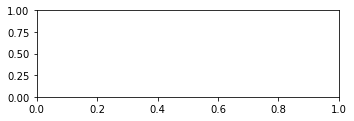

In [3]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

继续我们的例子

In [3]:
import numpy as np
t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax.plot(t, s, color='blue', lw=2)

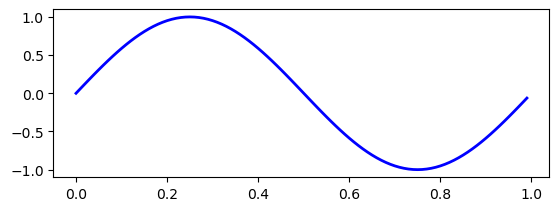

In [5]:
fig

In this example, ax is the Axes instance created by the fig.add_subplot call above (remember Subplot is just a subclass of Axes) and when you call ax.plot, it creates a Line2D instance and adds it to the Axes.lines list. In the interactive ipython session below, you can see that the Axes.lines list is length one and contains the same line that was returned by the line, = ax.plot... call:

在这个例子中，ax是之前通过调用fig.add_subplot创建的Axes实例，回忆一下前面讲的，Subplot是Axes的子类。当调用ax.plot时，该方法会创建一个Line2D实例，并将实例加入Axes.lines列表。

In [4]:
ax.lines

In [5]:
line

我们可以看到ax.lines只有一个元素，并且与line是同一个。下面我们在调用一次ax.plot看看会发生什么？

In [6]:
line2, = ax.plot(t, s, color='red', lw=2)

In [8]:
ax.lines

In [9]:
line2

现在ax.lines中有了两个元素，既line与line2 因为2条曲线重合在一起所以看起来只是变了颜色，我们应该删除一条，这样比较合理。

In [10]:
# del ax.lines[0]
ax.lines.remove(line)  # one or the other, not both!

In [11]:
ax.lines

In [12]:
line

The Axes also has helper methods to configure and decorate the x-axis and y-axis tick, tick labels and axis labels:

Axes也具有配置和装饰x-axis与y-axis刻度，刻度标签和轴标签的辅助方法。

In [13]:
xtext = ax.set_xlabel('my xdata') # returns a Text instance
ytext = ax.set_ylabel('my ydata')

When you call ax.set_xlabel, it passes the information on the Text instance of the XAxis. Each Axes instance contains an XAxis and a YAxis instance, which handle the layout and drawing of the ticks, tick labels and axis labels.

当调用ax.set_xlabel时，其向XAxis的Text实例传递信息。每一个Axes实例包含一个XAxis实例和一个YAxis实例，它们处理刻度，刻度标签与轴标签的布局与绘制。

## 定制对象

Every element in the figure is represented by a matplotlib Artist, and each has an extensive list of properties to configure its appearance. The figure itself contains a Rectangle exactly the size of the figure, which you can use to set the background color and transparency of the figures. Likewise, each Axes bounding box (the standard white box with black edges in the typical matplotlib plot, has a Rectangle instance that determines the color, transparency, and other properties of the Axes. These instances are stored as member variables Figure.patch and Axes.patch ("Patch" is a name inherited from MATLAB, and is a 2D "patch" of color on the figure, e.g., rectangles, circles and polygons). Every matplotlib Artist has the following properties

图形中的每一个元素都是由Artist描绘的，每一个元素都有一个广泛的属性列表用于配置其外观。图形本身包含一个与图形大小完全相同的矩形，用来设置图形的背景颜色和透明度。 同样，每个Axes边界框（在典型的matplotlib图中带有黑边的标准白色框）都有一个Rectangle实例，该实例确定Axes的颜色，透明度和其他属性。

Each of the properties is accessed with an old-fashioned setter or getter (yes we know this irritates Pythonistas and we plan to support direct access via properties or traits but it hasn't been done yet). For example, to multiply the current alpha by a half: